UFRJ/COPPE/PEE<br>
COC800 Data Mining - Trabalho Final - Prof Alexandre G. Evsukoff<br>
Alunos: Gustavo Martins da Silva Nunes e Michel Morais Ferreira<br>


# Census Income Dataset

## 1. Introdução
<div align="justify"><br>
Este notebook apresenta o desenvolvimento realizado para o trabalho final da disciplina COC800 Data Mining no período letivo de 2018/1. 
</div>

### 1.1 Apresentação do Problema
<div align="justify"><br>
A base de dados [Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) é um subconjunto dos dados obtidos no censo demográfico realizado nos Estados Unidos no ano de 1994[1]. O dataset a ser estudado possui 15 variáveis das 40 utilizadas no conjunto de dados do censo realizado[2], sendo 14 destas variáveis informações sobre a população, tais como idade, raça, profissão, horas de trabalho por semana entre outras, e uma variável que representa se o cidadão recebe anualmente mais de \$50.000 dólares ao ano ou não. A tarefa a ser realizada no estudo desse conjunto de dados é a tarefa de classificação dos cidadãos em duas classes: cidadãos com ganhos anuais iguais ou superiores a $50.000 por ano, ou cidadãos com ganhos inferiores a este. 
  
A escolha por este dataset foi motivada devido à variedade de informações a serem tratadas, tais como dados faltantes e a necessidade do tratamento de variáveis mistas(variáveis contínuas e variáveis categóricas), além do extenso número de artigos que foram escritos utilizando esta base de dados como base de comparação de performance de algoritmos de diversos modelos de aprendizado de máquinas.
</div>

### 1.2 Objetivo
<div align="justify"><br>
O trabalho tem como objetivo utilizar os modelos estudados durante o curso para classificarmos com a maior acurácia possível os cidadãos nos dois grupos de renda citados anteriormente. Após o treinamento dos modelos, será feita a comparação entre a performance dos modelos.
</div>

### 1.3 Apresentação da Tecnologia
<div align="justify"><br>
Devido à facilidade e experiência prévia dos participantes do grupo, a linguagem <i>Python</i> será utilizada para a realização do projeto. Devido à sua versatilidade, grande quantidade de materiais disponíveis na internet e muitas bibliotecas voltadas para análise de dados e criação de modelos de <i>machine learning</i>, a linguagem <i>Python</i> é uma excelente candidata para o projeto. 

Para a realização das análises dos dados serão usadas as bibliotecas mais utilizadas para este fim, sendo elas: <b><i>Numpy, Scipy e Pandas</i></b>. Para a visualização dos dados, serão utilizadas as bibliotecas <b><i>Matplotlib e Seaborn</i></b>. Para a construção dos modelos de aprendizado de máquinas, as bibliotecas utilizadas serão <b><i>Scikit-Learn, TensorFlow e Keras</i></b>
</div>

### 1.4 Caracterização e Visualização de Dados
<div align="justify"><br>
Será realizada a análise exploratória dos dados para a averiguação dos dados e compreensão dos mesmos. A fase de exploração de dados será decisiva para a construção de um modelo consistente para a classificação correta esperada pro problema. Após a análise exploratória, será realizado o pré-processamento dos dados, onde serão tratados dados faltantes, análise de outliers e o tratamento apropriado de cada tipo de variável(contínua ou categórica) para serem utilizadas como entrada para o modelo de aprendizado de máquinas.
</div>

## 2. Análise Exploratória dos Dados

In [1]:
# Importanto os módulos necessários para o processamento dos dados
import numpy   as np
import pandas  as pd

# Módulos necessários para visualização dos dados
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# O arquivo de dados não possui headers; Incluir uma lista de nomes das features
features = ['age','workclass','fnlwgt','education','education-num','marital-status',
            'occupation','relationship','race','sex','capital-gain','capital-loss',
            'hours-per-week','native-country','earnings']

# Importando os dados do dataset
training_data = pd.read_csv('Data/train.txt',names=features,index_col=False)
test_data = pd.read_csv('Data/test.txt',names=features,index_col=False)

#### 2.1 Verificando os dados do conjunto de treinamento

In [2]:
# Verificando a base de treinamento 
print('Quantidade de exemplos presentes na base: {}\nQuantidade de features presentes na base: {}'.format(*training_data.shape))

Quantidade de exemplos presentes na base: 32561
Quantidade de features presentes na base: 15


In [3]:
# Exemplos da base
training_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Verificando os tipos de dados presentes
print('Tipos de dados presentes nas bases de dados:\n\n{}'.format(training_data.dtypes))

Tipos de dados presentes nas bases de dados:

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
earnings          object
dtype: object


In [5]:
# Verificando as variáveis categóricas 
training_data_categorical = training_data.select_dtypes(include=['object'])
training_data_categorical.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,earnings
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [6]:
# Dividindo as variáveis categóricas em dummies

training_data_categorical_ext = pd.get_dummies(training_data_categorical)
training_data_aux = training_data.drop(axis=1, labels=list(training_data_categorical.columns.values))

# Montando o dataset com as variáveis dummies
training_data_with_dummies = pd.concat([training_data_aux, training_data_categorical_ext], axis=1)
training_data_with_dummies.head()



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,earnings_ <=50K,earnings_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


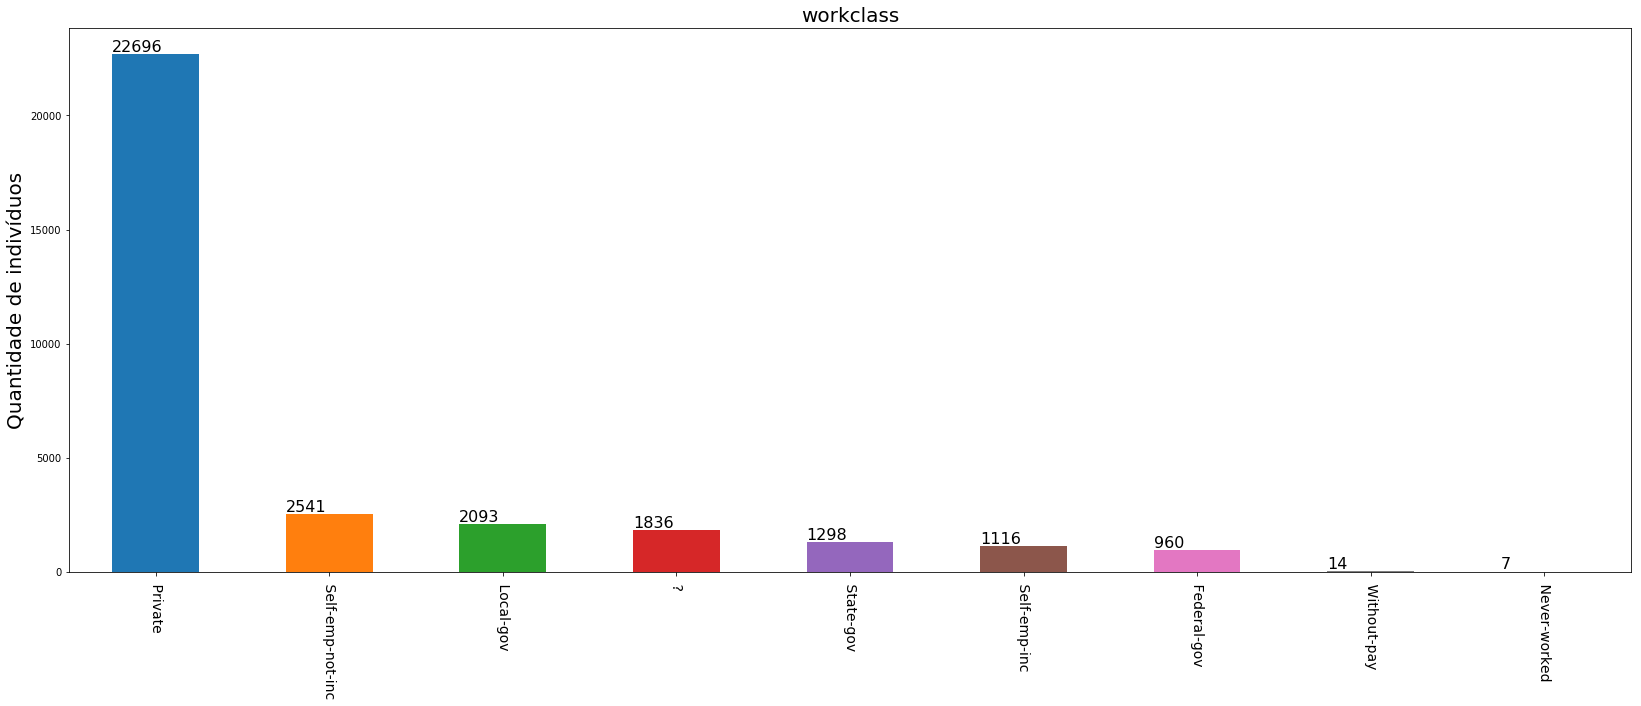

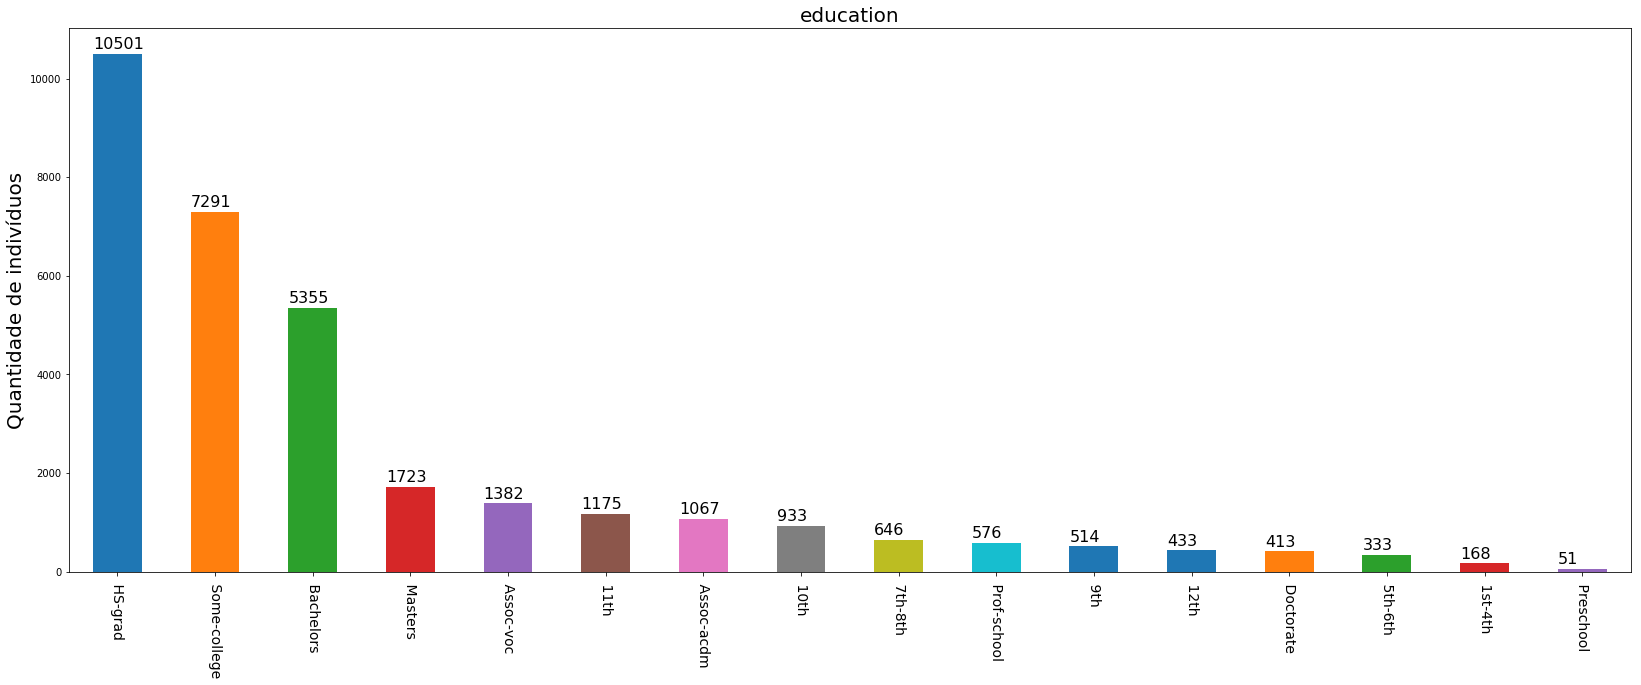

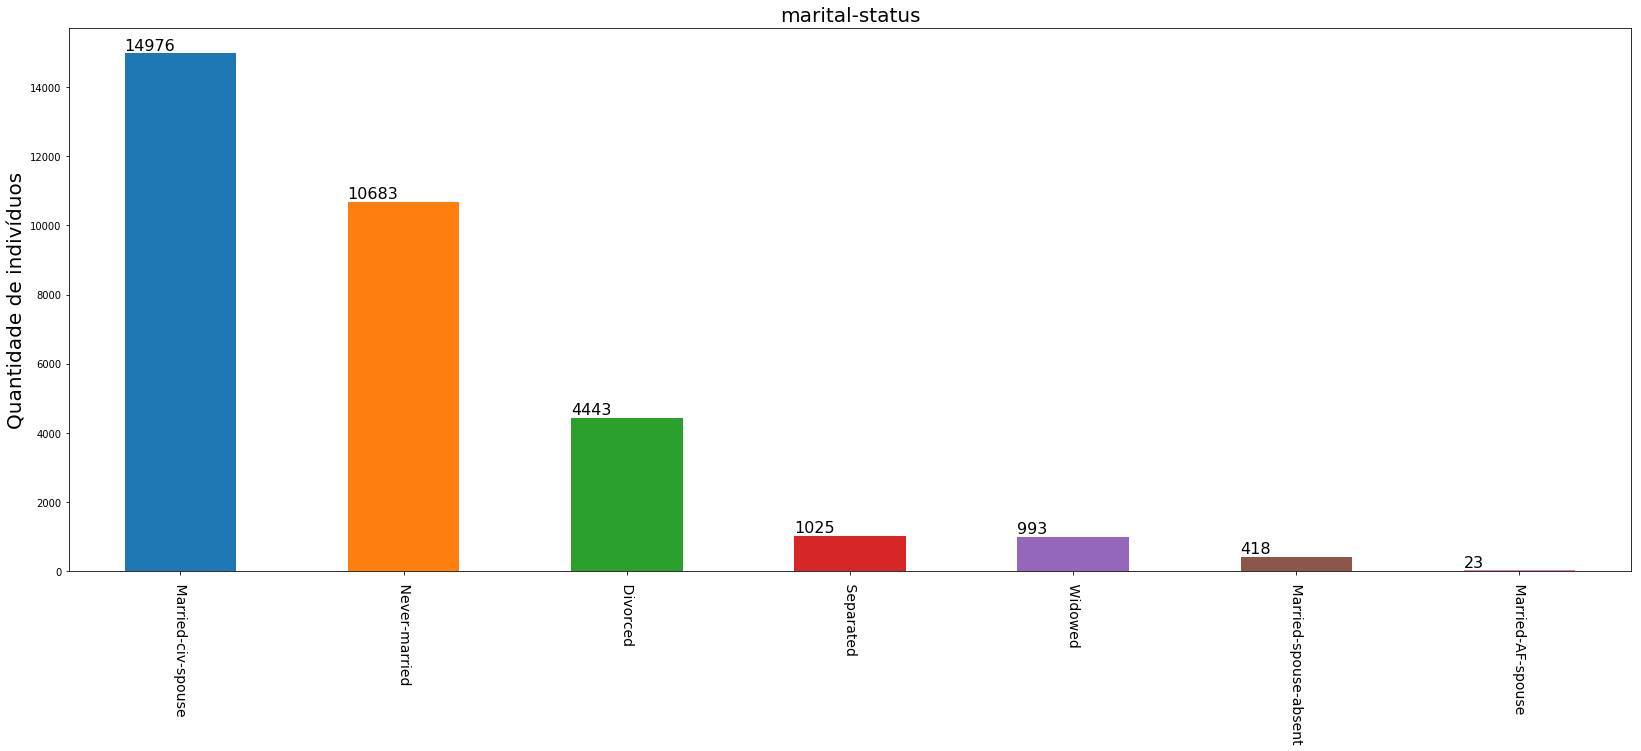

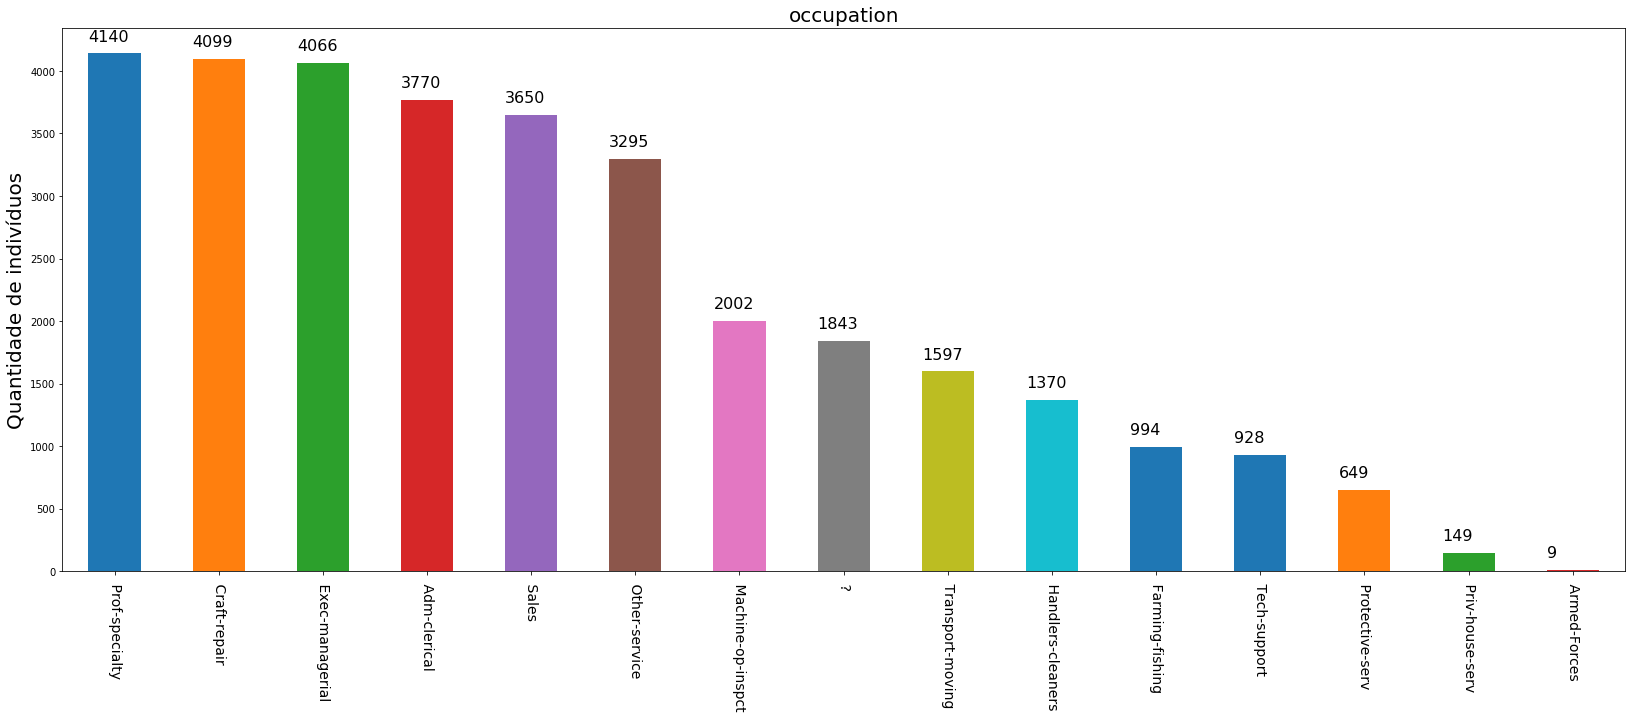

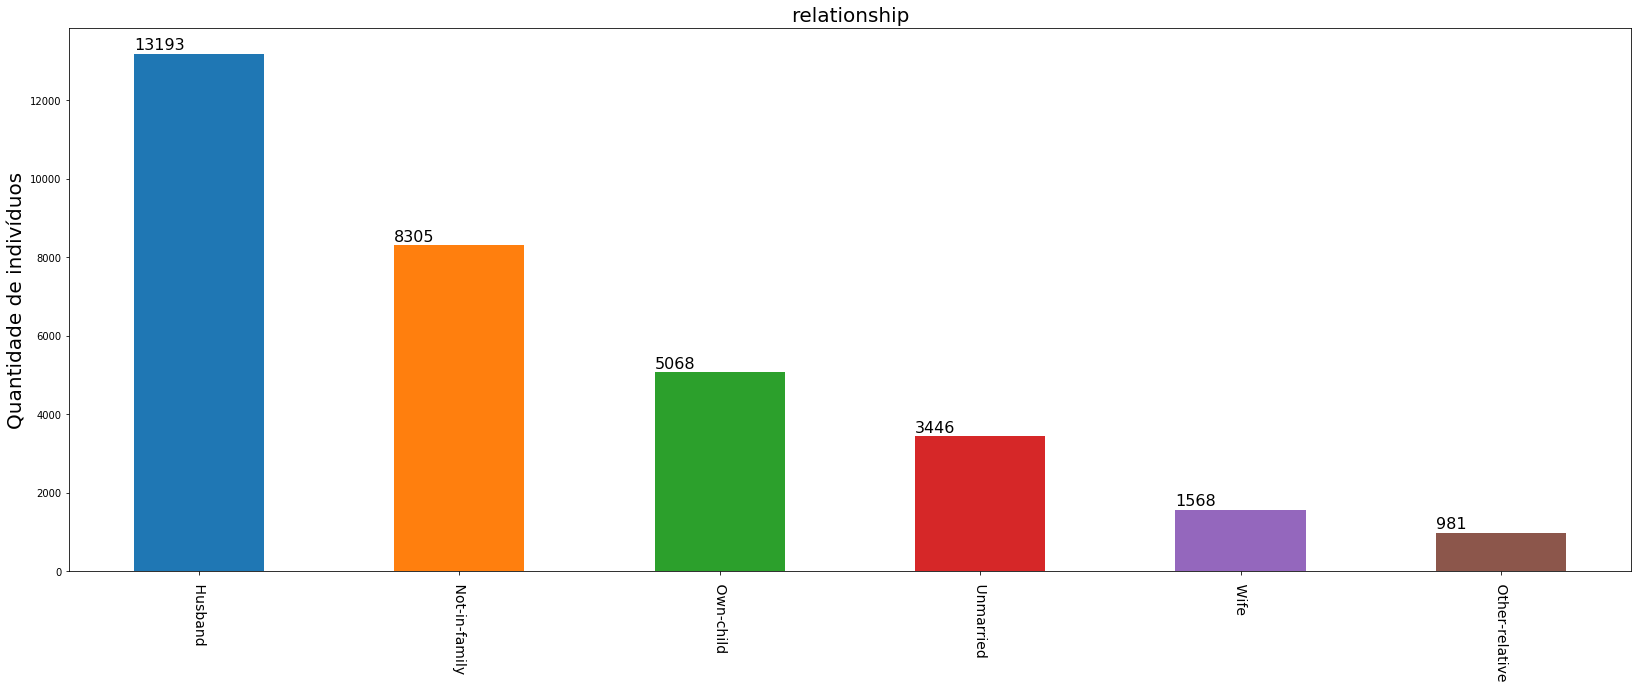

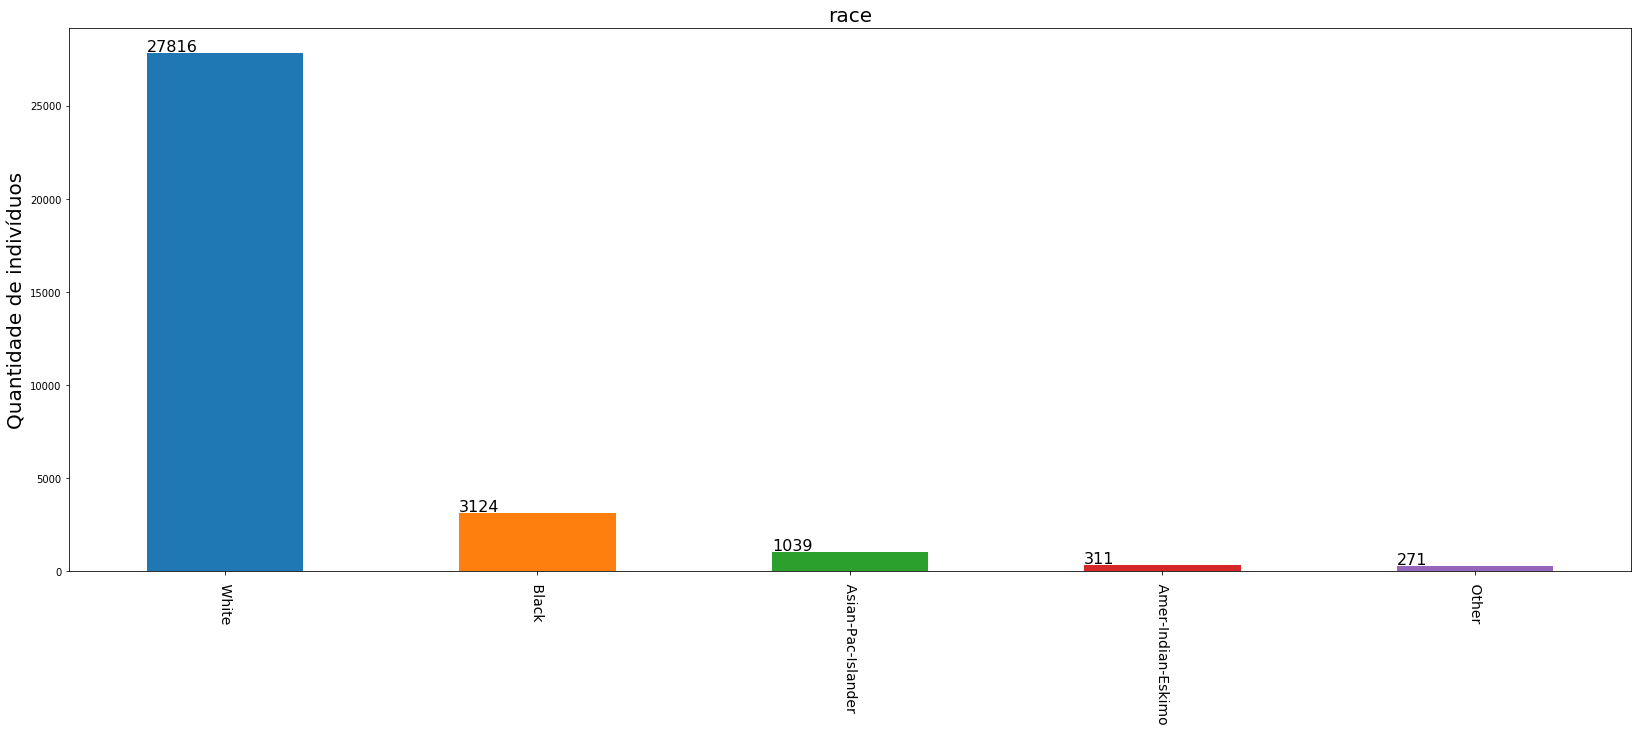

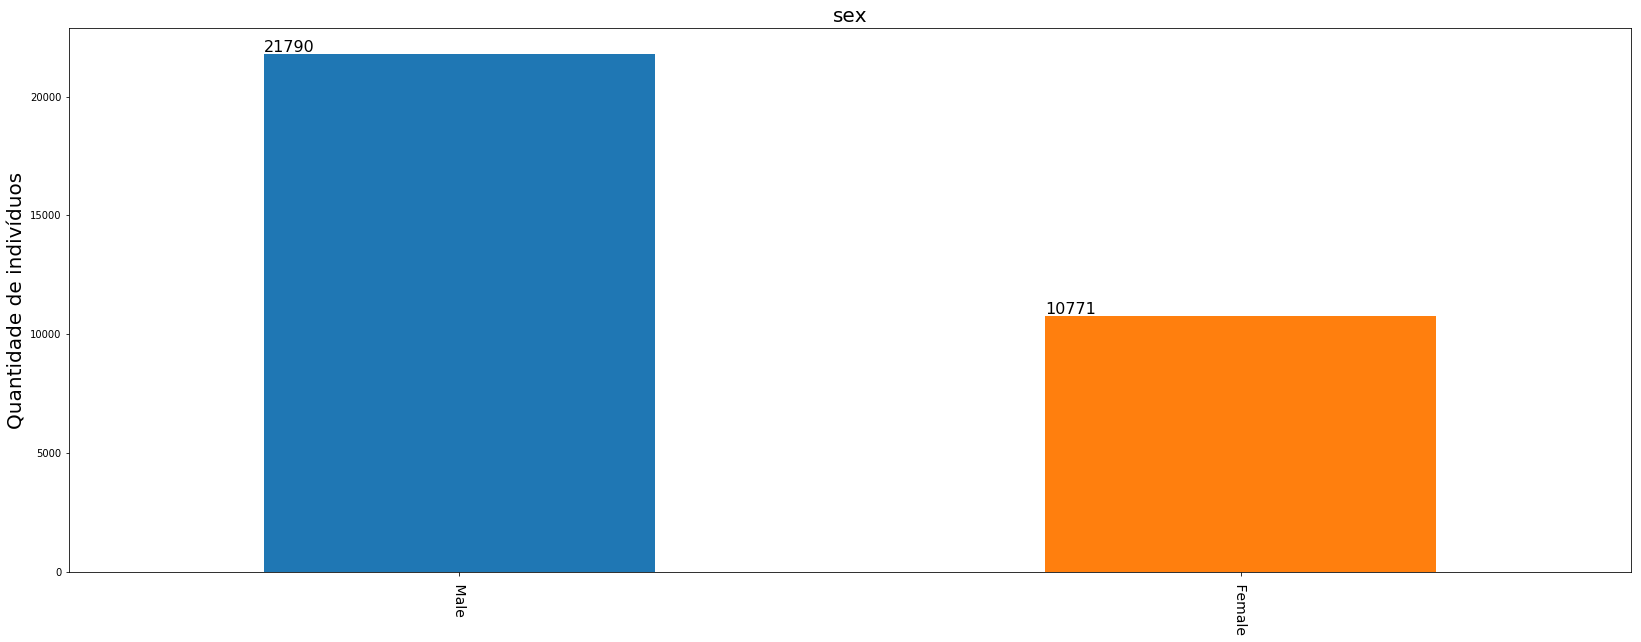

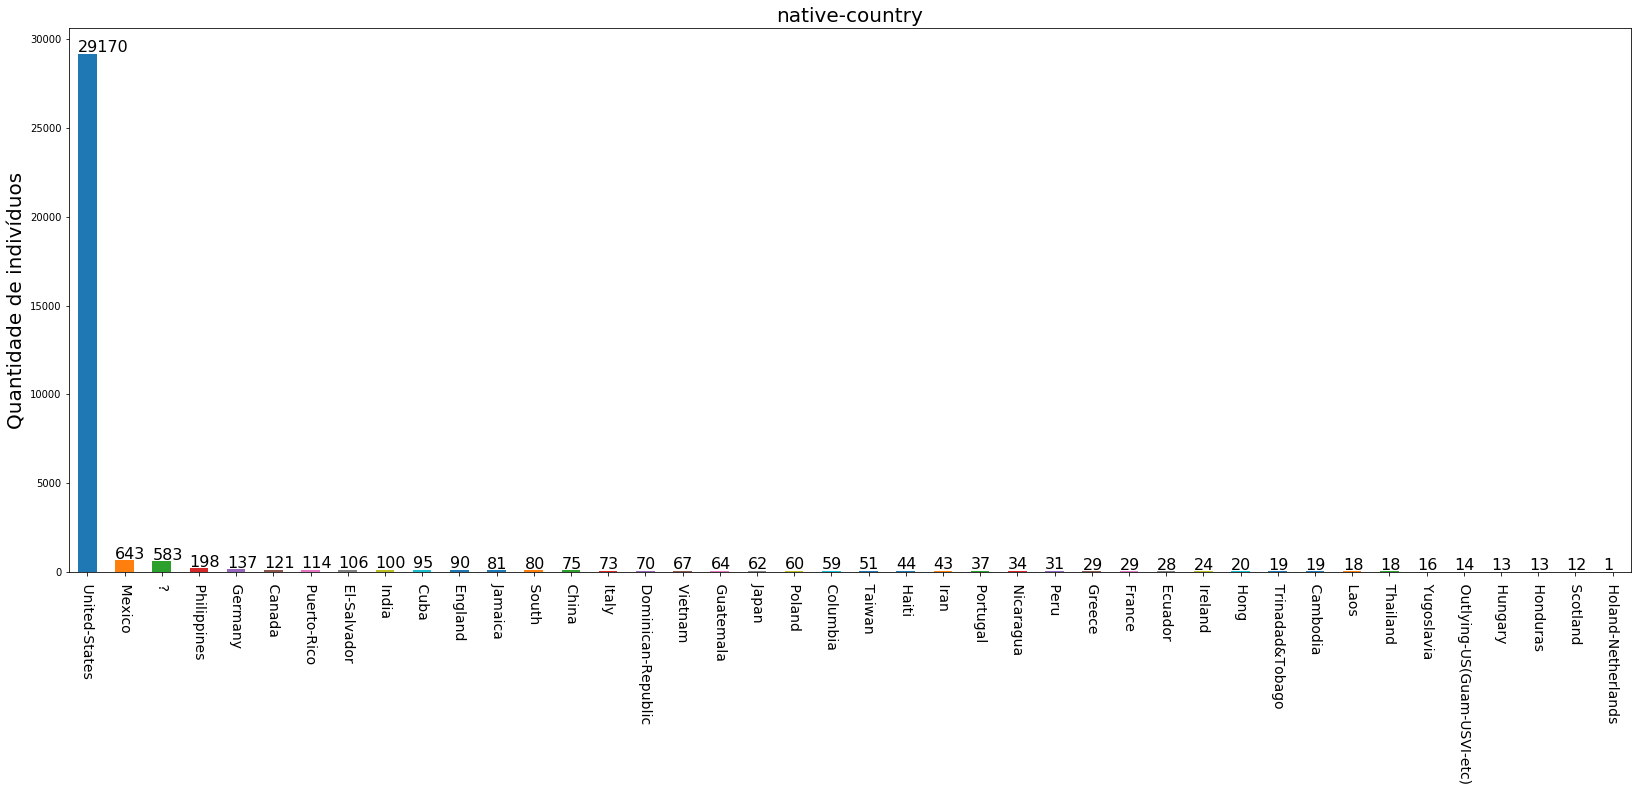

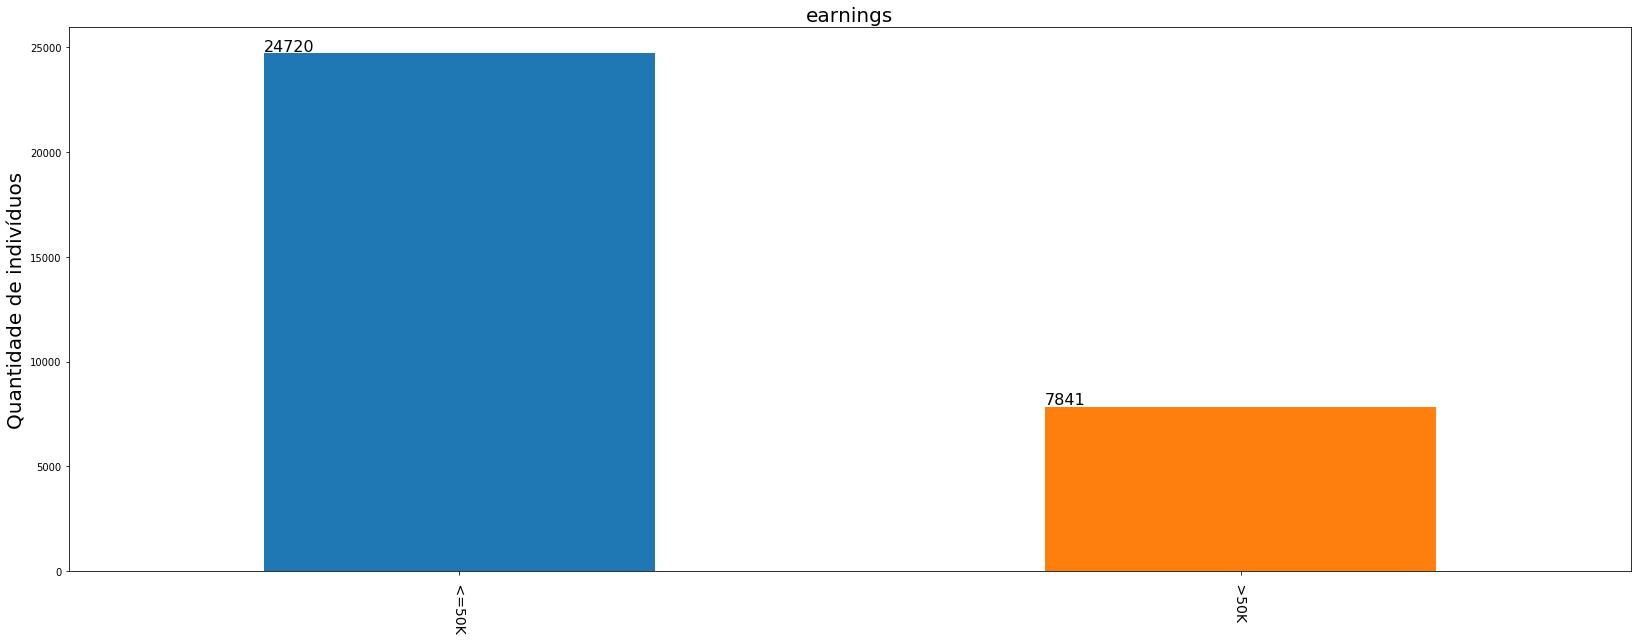

In [7]:
# Quais os possíveis valores para cada feature?
for feature in list(training_data_categorical.columns):
    # Configuração dos plots
    plt.figure(figsize=(28,10))
    plt.title(feature,fontsize=20)
    plt.ylabel('Quantidade de indivíduos',fontsize=20)
    
    # Configurando os textos no gráfico
    ax = training_data_categorical[feature].value_counts().plot.bar()
    ax.set_alpha(0.8)
        
    for patch in ax.patches:
        ax.text(patch.get_x(), patch.get_height() + 100, str(patch.get_height()),fontsize=16)
        plt.xticks(rotation=-90,fontsize=14)
        
plt.show()

#### 2.2 Análise das features numéricas

In [8]:
training_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### 2.2.1 Análise da feature <i>Age</i>

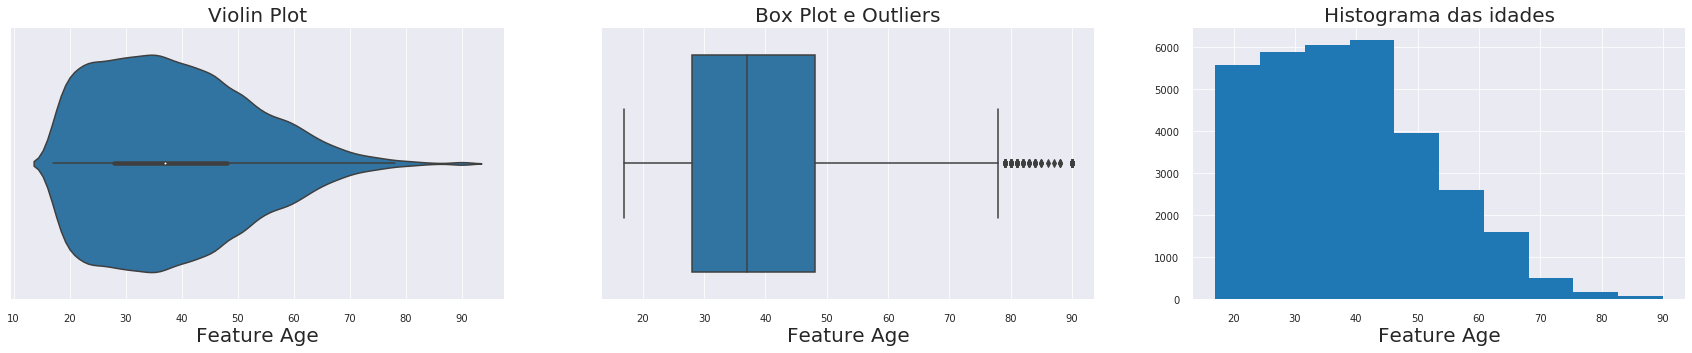

In [9]:
# Visualização da feature Age

# Configuração do estilo e tamanho das imagens
f, ax = plt.subplots(figsize=(30,5))
sns.set_style("darkgrid")

# Violin plot, interessante para saber a concentração dos dados
plt.subplot(131)
sns.violinplot(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Violin Plot',fontsize=20)

# Boxplot, para visualização dos outliers
plt.subplot(132)
sns.boxplot(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Box Plot e Outliers',fontsize=20)

# Histograma dos dados
plt.subplot(133)
plt.hist(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Histograma das idades',fontsize=20)

# Talvez tire em breve esse trecho...
sns.despine(offset=10,trim=True)
plt.show()

##### 2.2.2 Análise das features capital-gain e capital-loss

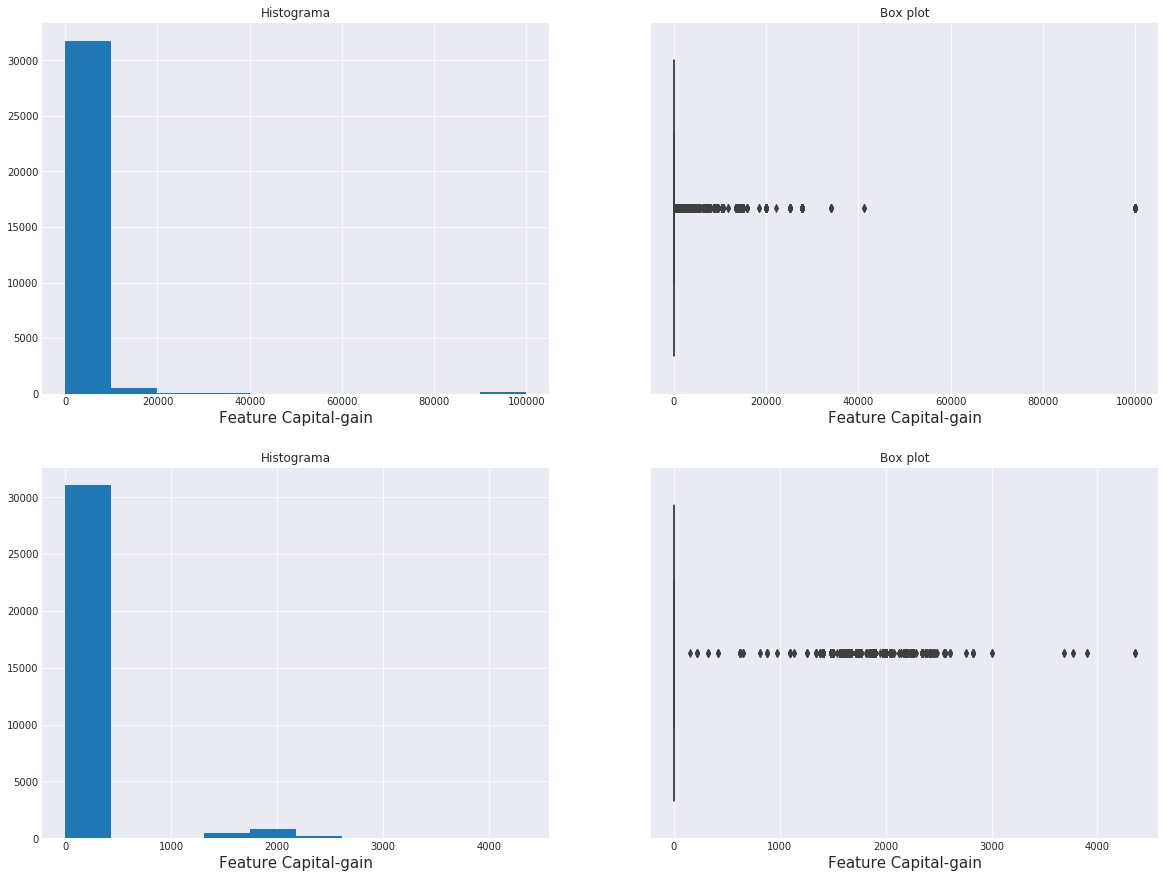

In [20]:
# Feature capital-gain

plt.subplots(figsize=(20,15))

plt.subplot(221)
plt.hist(training_data["capital-gain"])
plt.xlabel('Feature Capital-gain', fontsize=15)
plt.title("Histograma")

plt.subplot(222)
sns.boxplot(training_data["capital-gain"])
plt.xlabel('Feature Capital-gain', fontsize=15)
plt.title("Box plot")

plt.subplot(223)
plt.hist(training_data["capital-loss"])
plt.xlabel('Feature Capital-loss', fontsize=15)
plt.title("Histograma")

plt.subplot(224)
sns.boxplot(training_data["capital-loss"])
plt.xlabel('Feature Capital-loss', fontsize=15)
plt.title("Box plot")

plt.show()

Aqui, vale ressaltar que a maioria dos valores de capital-gain e capital-loss são iguais a 0 (isso pode ser verificado pelos quartis). Os valores diferentes de 0 são outliers. Como tratar esses casos?

In [11]:
# De acordo com o gráfico boxplot, existem outliers presentes. Verificando exemplos considerados outliers (acima de 75%)
# Definição dos quantis
Q1, Q3 = training_data.age.quantile(0.25), training_data.age.quantile(0.75)

# Definição de IQR de acordo com a teoria
IQR = Q3 - Q1

outliers = training_data[training_data.age > (Q3 + 1.5 * IQR)]
outliers.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
430,80,?,107762,HS-grad,9,Widowed,?,Not-in-family,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [12]:
# Um pouco mais sobre os outliers:
outliers.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,83.930070,160467.279720,9.517483,1281.363636,134.062937,28.223776
std,4.398544,88682.488827,3.469897,4283.654445,637.433567,16.975716
min,79.000000,20101.000000,2.000000,0.000000,0.000000,1.000000
25%,80.000000,97599.000000,9.000000,0.000000,0.000000,15.000000
50%,82.000000,147097.000000,9.000000,0.000000,0.000000,26.000000
75%,90.000000,201940.500000,13.000000,0.000000,0.000000,40.000000
max,90.000000,562336.000000,16.000000,20051.000000,4356.000000,99.000000


In [13]:
# Quantos outliers?
print('Quantidade de outliers: {}\nPorcentagem de outliers em relação aos dados:{:.4f}%'.format(outliers.shape[0],(outliers.shape[0]/training_data.shape[0])*100))

Quantidade de outliers: 143
Porcentagem de outliers em relação aos dados:0.4392%


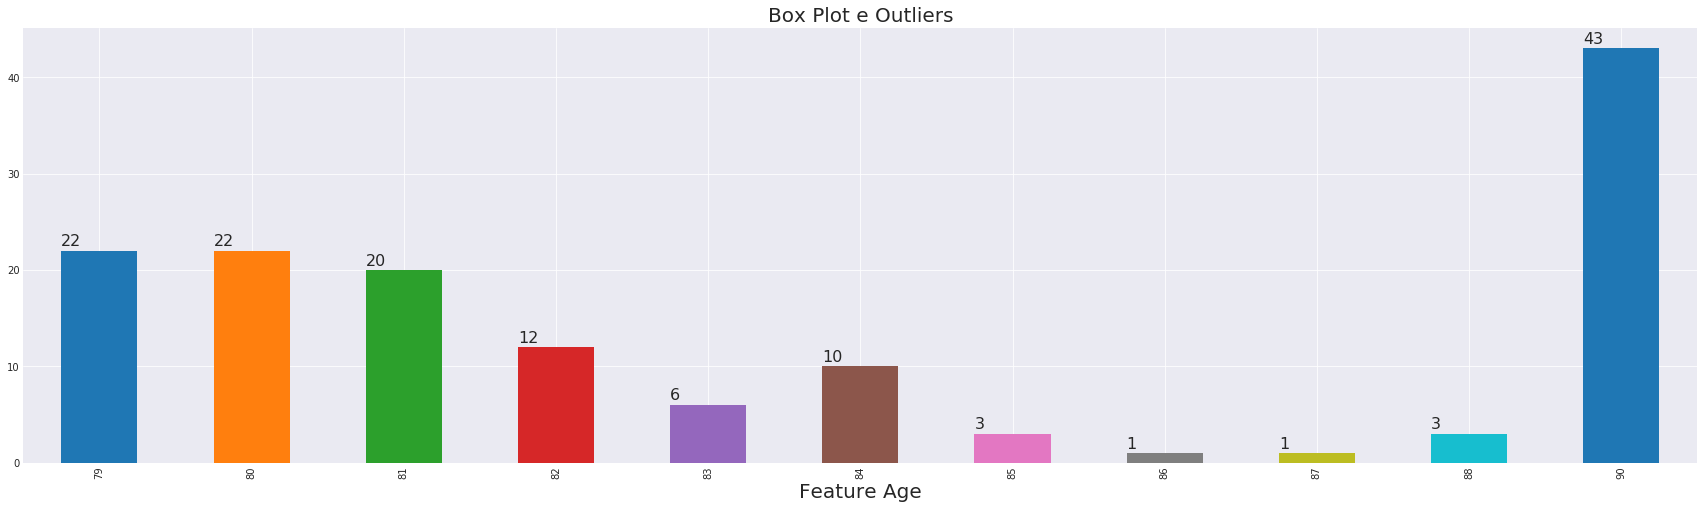

In [14]:
# Histograma dos outliers
plt.figure(figsize=(30,8))
sns.set_style("darkgrid")

# BoxPlot
ax = outliers.age.value_counts().sort_index().plot.bar()
plt.xlabel('Feature Age',fontsize=20)
plt.title('Box Plot e Outliers',fontsize=20)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height() + 0.5, str(patch.get_height()),fontsize=16)
    
plt.show()

##### Qual a relação entre age e earnings?

## 3. Pré-processamento dos dados

#### Transformação dos targets em -1 e +1

In [15]:
# Transformação do target: utilização de -1 para ganhos menores que 50K/Year, +1 para ganhos maiores de 50K/year
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

#### Separação do dataset

In [16]:
# Separação do dataset em treino e teste
from sklearn.model_selection import train_test_split

## 4. Treinamento dos modelos

### 4.1 Árvores binárias de decisão

### 4.2 Random Forests

### 4.3 Redes Neurais

### 4.4 Naive Bayes

### 4.5 SVM

## 5. Resultados

Anotações:

- Verificar a relação entre outliers(idade) e desfecho (<50K). Parece que idosos ganham menos que 50K
- 


## 6. Referências Bibliográficas

[1] (Online) UCI Machine Learning Repository: Census Income Dataset. Disponível em https://archive.ics.uci.edu/ml/datasets/Census+Income. Último acesso: 21/03/2018 às 00:22 horas.

[2] (Online) UCI Machine Learning Repository: Census Income KDD. Disponível em https://archive.ics.uci.edu/ml/datasets/Census-Income+(KDD). Último acesso: 21/03/2018 às 01:30 horas.

[3] (Online) Classifying Income data from Census 1994 Data. Disponível em https://cseweb.ucsd.edu/~jmcauley/cse190/reports/sp15/024.pdf. Último acesso: 21/03/2018 às 01:32 horas.

[4] Ristanoski, Goce & Liu, Wei & Bailey, James. (2013). Discrimination aware classification for imbalanced datasets. International Conference on Information and Knowledge Management, Proceedings. 1529-1532. 10.1145/2505515.2507836.

[5]

[6]
